# Template notebook

git repo: https://github.com/karamfr/edukate_hackathon

It's good to start with an introduction, to set the scene and introduce your audience to the data, and the problem you're solving as a team.

<br>

## Libraries
As always, we'll start by importing the necessary libraries.

In [238]:
# It's good practice to add comments to explain your code 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Functions

In [239]:
def summarise_columns(input_df):
    df_summary = pd.DataFrame(input_df.isnull().sum(),columns = ['null_count'])
    df_summary['null_proportion'] = df_summary['null_count']/len(input_df)
    df_summary['count_unique'] = input_df.nunique()
    df_summary['data_type'] = input_df.dtypes
    return df_summary
 
#define a function to show different values for each column
 
def value_counts_summary(input_df,factor_name,sort_index = False, max_levels = 1000):
    #create 
    summary_df = pd.DataFrame(columns = ['count','proportion','cumul_proportion'])
 
    if sort_index:
        summary_df['count'] = input_df[factor_name].value_counts().sort_index()
    else:
        summary_df['count'] = input_df[factor_name].value_counts()
 
    summary_df['proportion'] = summary_df['count']/len(input_df)
    summary_df['cumul_proportion'] = summary_df['proportion'].cumsum()
    summary_df.reset_index(inplace= True)
    return summary_df[:min(max_levels,len(summary_df))]

In [303]:
def get_data(df, train_start = '2020-03-21', test_start = '2020-03-31', test_end = '2020-04-07', source='paper'):
    """
    Function to produce train-validation and test dfs
    """
    df = df[df['corona_result'] != 'other']
    
    train_start = pd.to_datetime(train_start)
    test_start = pd.to_datetime(train_start)
    test_end = pd.to_datetime(train_start)
    
    if source == 'paper':
        df_trainvalidation = df[df['test_date'].between('2020-03-21', '2020-03-31', 'right')]
        df_test = df[df['test_date'].between('2020-03-31', '2020-04-07', 'right')]
        return df_trainvalidation, df_test
    else:
        df_trainvalidation = df[df[train_start].between(train_start, test_start, 'right')]
        df_test = df[df['test_date'].between(test_start, test_end, 'right')]
    
    return df_trainvalidation, df_test

## Import data 

In [241]:
df = pd.read_csv("data/corona_tested_individuals_ver_006.english.csv")

/tmp/ipykernel_30/1990088523.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/corona_tested_individuals_ver_006.english.csv")


## EDA

In [242]:
df['corona_result'].value_counts(normalize=True)

corona_result
negative    0.933222
positive    0.052821
other       0.013957
Name: proportion, dtype: float64

In [243]:
num_rows = df.shape[0]
num_features = df.shape[1]

df.dtypes

test_date               object
cough                  float64
fever                  float64
sore_throat            float64
shortness_of_breath    float64
head_ache              float64
corona_result           object
age_60_and_above        object
gender                  object
test_indication         object
dtype: object

In [244]:
# filter data to a subset to mirror the date range
df['test_date'] = pd.to_datetime(df['test_date'])


In [245]:
df_paper_train = df[df['test_date'].between('2020-03-21', '2020-03-31', 'right')]
df_paper_test = df[df['test_date'].between('2020-03-31', '2020-04-07', 'right')]

value_counts_summary(df_paper_test, 'test_date', sort_index=True)

,test_date,count,proportion,cumul_proportion
0,2020-04-01,8654,0.177068,0.177068
1,2020-04-02,8188,0.167533,0.344600
2,2020-04-03,8079,0.165303,0.509903
3,2020-04-04,5145,0.105271,0.615174
4,2020-04-05,7509,0.153640,0.768814
5,2020-04-06,5368,0.109833,0.878647
6,2020-04-07,5931,0.121353,1.000000


In [246]:
print(f"Shape of train-validation date range used in paper {df_paper_train.shape}")
print(f"Shape of test date range used in paper {df_paper_test.shape}")
print(f"records in train validation quoted in paper: 51,831")
print(f"Shape of train-validation quoted in paper 47,401")

Shape of train-validation date range used in paper (53843, 10)
Shape of test date range used in paper (48874, 10)
records in train validation quoted in paper: 51,831
Shape of train-validation quoted in paper 47,401


<Axes: >

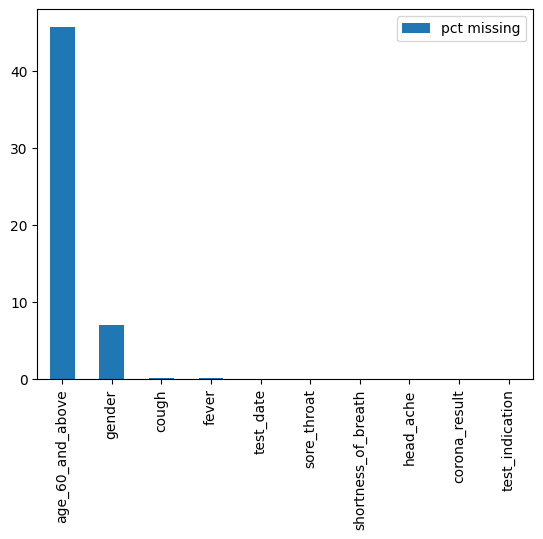

In [247]:
df_missing_values = pd.DataFrame(round(df.isna().sum() / num_rows * 100,2))
df_missing_values.rename(columns={0: 'pct missing'}, inplace=True)
df_missing_values.sort_values(by='pct missing', ascending=False, inplace=True)
df_missing_values.plot(kind='bar')

**Question / Task 1**

Think about possible biases and limitations of this dataset. What are the sources of uncertainty?

In [248]:
# Add your code here


**Question / Task 2**

What is the format of feature values?

In [305]:
# get the train-validation and test sets
df_trainvalidation, df_test = get_data(df, source='paper')
df_combined = pd.concat([df_trainvalidation, df_test])


In [250]:
df_trainvalidation.dtypes

test_date              datetime64[ns]
cough                         float64
fever                         float64
sore_throat                   float64
shortness_of_breath           float64
head_ache                     float64
corona_result                  object
age_60_and_above               object
gender                         object
test_indication                object
dtype: object

**Question / Task 3**

What is the statistics of these feature values? How many symptoms are reported or not?

In [306]:
pd.DataFrame(df_trainvalidation['corona_result'].value_counts()).reset_index()

,corona_result,count
0,negative,48225
1,positive,4795


In [252]:
print(df_trainvalidation.describe())

                           test_date         cough         fever  \
count                          53843  53827.000000  53826.000000   
mean   2020-03-26 23:27:19.098861824      0.149628      0.089065   
min              2020-03-22 00:00:00      0.000000      0.000000   
25%              2020-03-25 00:00:00      0.000000      0.000000   
50%              2020-03-27 00:00:00      0.000000      0.000000   
75%              2020-03-29 00:00:00      0.000000      0.000000   
max              2020-03-31 00:00:00      1.000000      1.000000   
std                              NaN      0.356709      0.284840   

        sore_throat  shortness_of_breath     head_ache  
count  53843.000000         53843.000000  53843.000000  
mean       0.015267             0.012146      0.022194  
min        0.000000             0.000000      0.000000  
25%        0.000000             0.000000      0.000000  
50%        0.000000             0.000000      0.000000  
75%        0.000000             0.000000     

**Question / Task 4**

Which symptoms have a reporting bias, i.e., likely to be reported when the patient is COVID positive?

**Question / Task 5**

How will the symptoms with reporting bias affect the model’s performance?

**Question / Task 6**

Visualization: Draw the bar graph of features grouped by the target class?

In [253]:
list(df_trainvalidation.columns)

['test_date',
 'cough',
 'fever',
 'sore_throat',
 'shortness_of_breath',
 'head_ache',
 'corona_result',
 'age_60_and_above',
 'gender',
 'test_indication']

Text(0.5, 1.0, 'Frequency count of corona result')

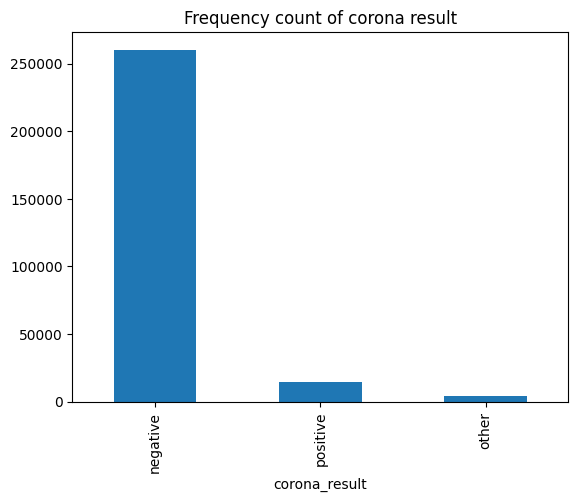

In [255]:
df_summary = df.corona_result.value_counts()
df_summary.plot(kind='bar')
plt.title('Frequency count of corona result')

## remove na's and drop rows where target != positive or negative

In [257]:
target = 'corona_result'


remove the target labels that are neither "positive" or "negative"

In [307]:
#map target to binary
map_replace_target_labels = {'positive': 1, 'negative': 0}
df_trainvalidation[target] = df_trainvalidation[target].map(map_replace_target_labels)
df_test[target] = df_test[target].map(map_replace_target_labels)

## Create pipeline

In [259]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeClassifier
#sklearn.pipeline.Pipeline(steps, *, transform_input=None, memory=None, verbose=False

In [308]:
#features to one hot encode
list_to_encode = ['test_indication', 'gender', 'age_60_and_above' ]

#stuff to ignore and drop from the model
list_to_passthrough = ['test_date']

#already binary features
list_to_pass_to_model = ['cough', 'fever', 'sore_throat', 'shortness_of_breath',
       'head_ache']


### Create X and y

? replace with train_test_split

In [219]:
"""
#map age to binary
age_map = {'No': 0, 'Yes': 1}
df_trainvalidation['age_60_and_above'] = df_trainvalidation['age_60_and_above'].map(age_map)


"""

In [328]:
"""
df_trainvalidation.sort_values(by='test_date', inplace=True)
df_test.sort_values(by='test_date', inplace=True)

df_trainvalidation= df_trainvalidation.map()
"""

from sklearn.model_selection import train_test_split

X = df_trainvalidation.drop(target, axis=1)
y = df_trainvalidation[target]
X_train, X_validation, y_train, y_validation = train_test_split(X, y, random_state=123)

In [329]:
X_test = df_test.drop(target, axis=1)
y_test = df_test[target]


set up pre-processor pipeline

In [330]:
encoder_onehot = OneHotEncoder(drop='if_binary', handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        #("num", numeric_transformer, numerical_features),
        ("cat", encoder_onehot, list_to_encode),
        ("bool", "passthrough", list_to_pass_to_model),
        #("time", "passthrough", time_features),
    ],
    verbose_feature_names_out=False,
    remainder = 'drop' #model will ignore date field
)

classifier = DecisionTreeClassifier()

pipeline = Pipeline([
    ('preprocessor', preprocessor), 
    ('clf', classifier)
])


In [332]:

X_train_transformed = pd.DataFrame(preprocessor.fit_transform(X_train),columns = preprocessor.get_feature_names_out())

#X_train_transformed

In [337]:
pipeline.fit(X_train, y_train)

#ignoring validation

y_validation_pred = pipeline.predict(X_validation)
y_pred = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)


In [334]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

#train scores
accuracy_train = accuracy_score(y_train, y_pred)
precision_train = precision_score(y_train, y_pred)
recall_train = recall_score(y_train, y_pred)
f1score_train = f1_score(y_train, y_pred)

#validation scores
accuracy_val = accuracy_score(y_validation, y_validation_pred)
precision_val = precision_score(y_validation, y_validation_pred)
recall_val = recall_score(y_validation, y_validation_pred)
f1score_val = f1_score(y_validation, y_validation_pred)

print(f"\nAccuracy:")
print(f"Validation set = {accuracy_val}, Training set = {accuracy_train}")
print(f"\nPrecision:")
print(f"Validation set = {precision_val}, Training set = {precision_train}")
print(f"\nRecall:")
print(f"Validation set = {recall_val}, Training set = {recall_train}")
print(f"\nF1 Score:")
print(f"Validation set = {f1score_val}, Training set = {f1score_train}")


Accuracy:
Validation set = 0.9572236891738967, Training set = 0.9601156796177543

Precision:
Validation set = 0.8240740740740741, Training set = 0.8500347947112039

Recall:
Validation set = 0.6691729323308271, Training set = 0.6789883268482491

F1 Score:
Validation set = 0.7385892116182573, Training set = 0.7549443757725587


In [335]:
from sklearn.metrics import classification_report
print(classification_report(y_validation, y_validation_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     12058
           1       0.82      0.67      0.74      1197

    accuracy                           0.96     13255
   macro avg       0.90      0.83      0.86     13255
weighted avg       0.95      0.96      0.96     13255



In [341]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_test)


0.8085919920431028

Trying other classifiers

In [369]:
def run_pipe(dict_models,
             X_train, 
             y_train,
             X_validation,
             y_validation,
             X_test,
             y_test             
            ):
    
    dict_results = {}
    dict_confusion_matrixes = {}
    dict_roc_auc_scores = {}
    
    for model_name, model in dict_models.items():
        pipeline = Pipeline([
            ('preprocessor', preprocessor), 
            ('clf', model)
        ])

        pipeline.fit(X_train, y_train)

        #ignoring validation

        y_validation_pred = pipeline.predict(X_validation)
        y_pred = pipeline.predict(X_train)
        y_pred_test = pipeline.predict(X_test)

        #train scores
        accuracy_train = accuracy_score(y_train, y_pred)
        precision_train = precision_score(y_train, y_pred)
        recall_train = recall_score(y_train, y_pred)
        f1score_train = f1_score(y_train, y_pred)

        #validation scores
        accuracy_val = accuracy_score(y_validation, y_validation_pred)
        precision_val = precision_score(y_validation, y_validation_pred)
        recall_val = recall_score(y_validation, y_validation_pred)
        f1score_val = f1_score(y_validation, y_validation_pred)
        
        temp_results_dict = {}
        temp_results_dict['accuracy_train'] = accuracy_train
        temp_results_dict['precision_train'] = precision_train
        temp_results_dict['recall_train'] = recall_train
        temp_results_dict['f1score_train'] = f1score_train
        temp_results_dict['accuracy_val'] = accuracy_val
        temp_results_dict['precision_val'] = precision_val
        temp_results_dict['recall_val'] = recall_val
        temp_results_dict['f1score_val'] = f1score_val
        
        dict_results[model_name] = temp_results_dict
        
        conf_matrix = classification_report(y_validation, y_validation_pred)
        dict_confusion_matrixes[model_name] = conf_matrix
        
        roc_score = roc_auc_score(y_test, y_pred_test)
        dict_roc_auc_scores[model_name] = roc_score
    
    df_results = pd.DataFrame(dict_results)
    
    
    return df_results, dict_confusion_matrixes, dict_roc_auc_scores

In [360]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

import xgboost as xgb

In [362]:
dict_models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'XGBoost': xgb.XGBClassifier()
    }

In [370]:
df_results, dict_results, dict_roc_auc_scores = run_pipe(dict_models,
             X_train, 
             y_train,
             X_validation,
             y_validation,
             X_test,
             y_test             
            )

In [382]:
y_train.shape

(39765,)

In [391]:
X_train['test_date'].value_counts().sort_index()

test_date
2020-03-22    2629
2020-03-23    2570
2020-03-24    3537
2020-03-25    4048
2020-03-26    4787
2020-03-27    4365
2020-03-28    4080
2020-03-29    3934
2020-03-30    4445
2020-03-31    5370
Name: count, dtype: int64

In [392]:
X_validation['test_date'].value_counts().sort_index()

test_date
2020-03-22     899
2020-03-23     875
2020-03-24    1133
2020-03-25    1363
2020-03-26    1694
2020-03-27    1444
2020-03-28    1438
2020-03-29    1282
2020-03-30    1417
2020-03-31    1710
Name: count, dtype: int64

In [393]:
X_test['test_date'].value_counts().sort_index()

test_date
2020-04-01    8585
2020-04-02    8107
2020-04-03    7993
2020-04-04    5088
2020-04-05    7451
2020-04-06    5341
2020-04-07    5897
Name: count, dtype: int64

In [367]:
df_results

,RandomForestClassifier,DecisionTreeClassifier,XGBoost
accuracy_train,0.960116,0.960116,0.960040
precision_train,0.848097,0.850035,0.845783
recall_train,0.681212,0.678988,0.682879
f1score_train,0.755549,0.754944,0.755651
accuracy_val,0.957827,0.957224,0.957525
precision_val,0.826176,0.824074,0.824131
recall_val,0.675021,0.669173,0.673350
f1score_val,0.742989,0.738589,0.741149


In [374]:
for model_name in dict_models.keys():
    print(model_name)
    print(dict_results[model_name])
    print("\n")

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     12058
           1       0.82      0.68      0.74      1197

    accuracy                           0.96     13255
   macro avg       0.90      0.83      0.86     13255
weighted avg       0.96      0.96      0.96     13255



DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     12058
           1       0.82      0.67      0.74      1197

    accuracy                           0.96     13255
   macro avg       0.90      0.83      0.86     13255
weighted avg       0.95      0.96      0.96     13255



XGBoost
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     12058
           1       0.82      0.67      0.74      1197

    accuracy                           0.96     13255
   macro avg       0.90      0.83      0.86     13255
weighted avg    